# Hindmarsh-Roseモデル

\begin{equation}
\left\{
    \begin{aligned}
        \dot{V} &= n - a V^3 + b V^2 - h + I,\\
        \dot{n} &= c - d V^2 -n, \\
        \dot{h} &= r(\sigma (V-V_0)-h).
    \end{aligned}
\label{eqn:HR}
\right.    
\end{equation}

$a = 1, b = 3, c = 1, d = 5, I = 2, r=0.001, \sigma =4, V_0=-1.6$とする

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set('poster', 'whitegrid', 'dark', rc={"lines.linewidth": 2, 'grid.linestyle': '--'})

In [2]:
def HR(t, x, a,b,c,d,I,r,s,V0):
    V,n,h = x[0],x[1],x[2]
    return [n - a * V**3 + b * V**2 - h + I, c - d * V**2 - n, r*(s*(V-V0)-h)]

In [3]:
t0 = 0.0
t1 = 2000.0

In [4]:
x0 = [-1.0, 2.0, 0.0]
s0 = solve_ivp(HR, [t0, t1], x0, args=([1.0, 3.0, 1.0, 5.0, 2.0, 0.001, 4.0, -1.6]), method='DOP853', dense_output=True, rtol=1e-10, atol=1e-12)

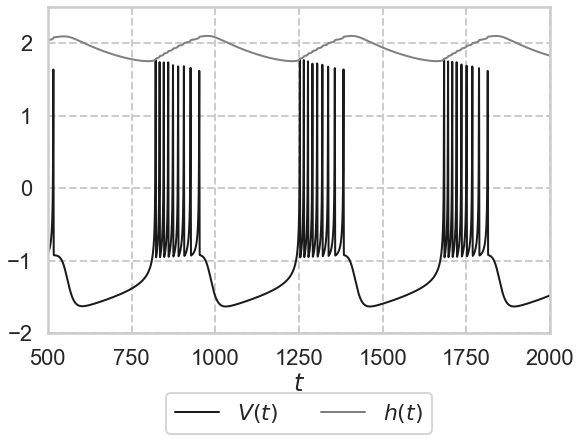

In [5]:
T = np.linspace(500, 2000, 10000)
sol = s0.sol(T)
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
ax.set_xlabel("$t$")
ax.set_xlim(500,2000)
ax.set_ylim(-2,2.5)
ax.plot(T, sol.T[:,0], '-k', linewidth=2, label="$V(t)$")
ax.plot(T, sol.T[:,2], '-', color='gray', linewidth=2, label="$h(t)$")
ax.legend(loc='upper center', bbox_to_anchor=(.5, -.15), ncol=2)
# plt.savefig("burst_vh.pdf", bbox_inches='tight')

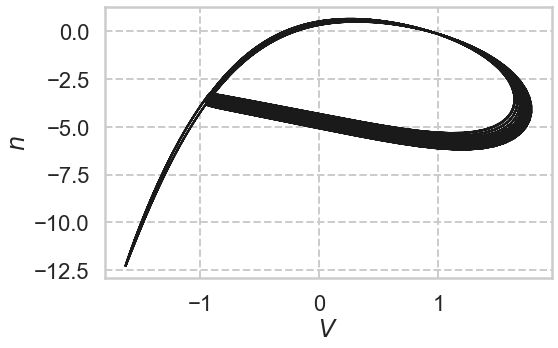

In [6]:
T = np.linspace(500, 2000, 40000)
sol = s0.sol(T)
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set_xlabel("$V$")
ax.set_ylabel("$n$")
ax.plot(sol.T[:,0],sol.T[:,1], '-k', linewidth=2)
# plt.savefig("burst_vn.pdf", bbox_inches='tight')

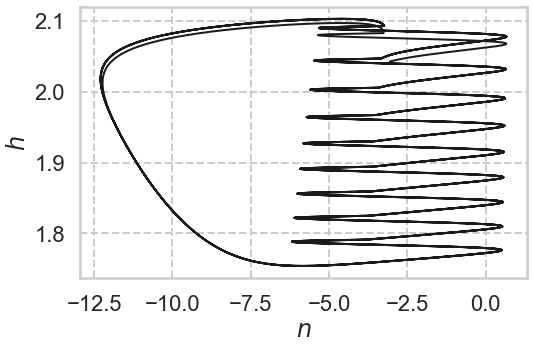

In [7]:
T = np.linspace(500, 2000, 40000)
sol = s0.sol(T)
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set_xlabel("$n$")
ax.set_ylabel("$h$")
ax.plot(sol.T[:,1],sol.T[:,2], '-k', linewidth=2)
# plt.savefig("burst_vh.pdf", bbox_inches='tight')